In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Resize all images to this size
BATCH_SIZE = 16

# Prepare data generators
train_dir = 'C:/Temp/extracted/genLogoOutput'
test_dir = 'C:/Temp/extracted/output'

train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 550 images belonging to 63 classes.
Found 275 images belonging to 63 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Build the model
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Use Input layer for the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 63)                  │           8,127 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,447 (28.23 MB)

 Trainable params: 7,400,447 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
EPOCHS = 10

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)


Epoch 1/10


C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 279ms/step - accuracy: 0.0379 - loss: 4.7877 - val_accuracy: 0.2291 - val_loss: 3.4710
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.2846 - loss: 3.1097 - val_accuracy: 0.6945 - val_loss: 1.4314
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.7494 - loss: 1.2193 - val_accuracy: 0.9309 - val_loss: 0.3735
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9324 - loss: 0.2965 - val_accuracy: 0.9636 - val_loss: 0.1547
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9703 - loss: 0.1212 - val_accuracy: 0.9782 - val_loss: 0.0719
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9844 - loss: 0.0656 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9975 - loss: 0.0171 - val_accuracy: 0.9891 - val_loss: 0.0455
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9957 - loss: 0.0251 - val_accuracy: 1.000

In [4]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 6.8002e-04
Test Accuracy: 100.00%


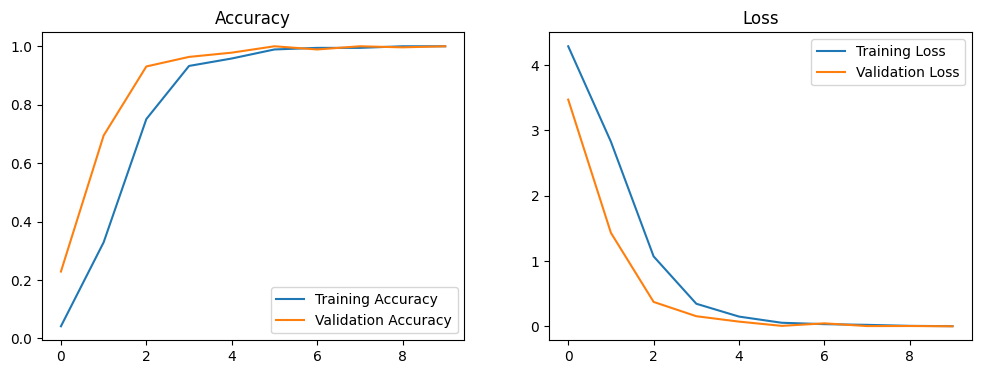

In [5]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [11]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
def predict_logo(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    print(f"Predicted Logo: {class_label}")

# Test with a new image
predict_logo('C:/Temp/imagee.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Logo: Starbucks
